In [4]:
import torch
import torchvision

from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split

from torchvision import transforms
from torchvision.transforms import v2


import os
import json
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

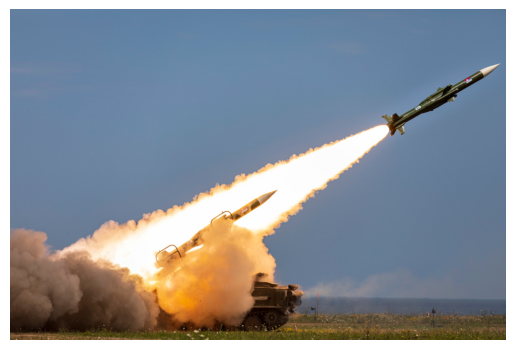

In [6]:
plt.axis("off")
plt.imshow(Image.open("img.jpg"))

In [7]:
img = np.array(Image.open("img.jpg"))
print(type(img))
print(img.shape)
print(img.dtype)
print(f"min-- {img.min()}, max-- {img.max()}")

<class 'numpy.ndarray'>
(800, 1200, 3)
uint8
min-- 0, max-- 255


### преобразование в тензор

In [8]:
transform = transforms.ToTensor()
img_tensor = transform(img)

print(type(img_tensor))
print(img_tensor.shape)
print(img_tensor.dtype)
print(f"min-- {img_tensor.min()}, max-- {img_tensor.max()}")

<class 'torch.Tensor'>
torch.Size([3, 800, 1200])
torch.float32
min-- 0.0, max-- 1.0


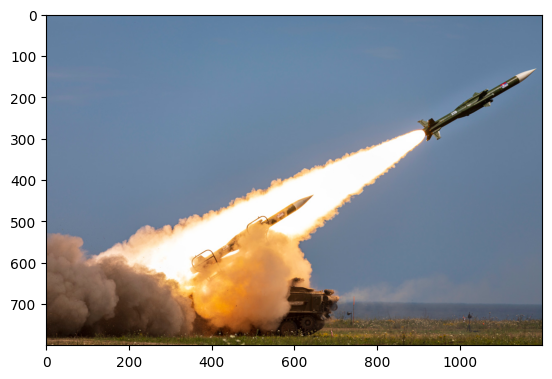

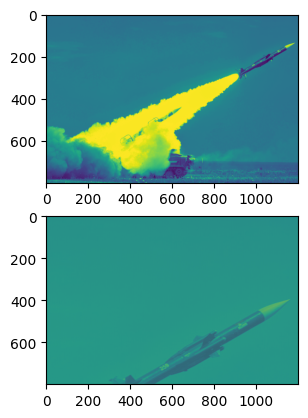

In [9]:
img = np.array(Image.open("img.jpg"))
transform = v2.ToImage()
img_t = transform(img)
plt.imshow(img)

_, ax = plt.subplots(2,1)
img_r = img.reshape([3, 800, 1200])
ax[0].imshow(img_t[0, ...])
ax[1].imshow(img_r[0, ...])

### Нормализация данных

In [10]:

transform = transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
img_norm = transform(img_tensor)

print(type(img_norm))
print(img_norm.shape)
print(img_norm.dtype)
print(f"min-- {img_norm.min()}, max-- {img_norm.max()}")

<class 'torch.Tensor'>
torch.Size([3, 800, 1200])
torch.float32
min-- -1.0, max-- 1.0


In [11]:
transform = transforms.Compose(
    [
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ]
)
img = transform(img)

print(type(img))
print(img.shape)
print(img.dtype)
print(f"min-- {img.min()}, max-- {img.max()}")

<class 'torch.Tensor'>
torch.Size([3, 800, 1200])
torch.float32
min-- -1.0, max-- 1.0


# V2

In [12]:
transform = v2.ToTensor()

img = transform(Image.open("img.jpg"))

print(type(img))
print(img.shape)
print(img.dtype)
print(f"min-- {img.min()}, max-- {img.max()}")

<class 'torch.Tensor'>
torch.Size([3, 800, 1200])
torch.float32
min-- 0.0, max-- 1.0


C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [13]:
transform = v2.ToImage()

img_v2 = transform(Image.open("img.jpg"))

print(type(img_v2))
print(img_v2.shape)
print(img_v2.dtype)
print(f"min-- {img_v2.min()}, max-- {img_v2.max()}")

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 800, 1200])
torch.uint8
min-- 0, max-- 255


### изменение типа данных в v2

In [14]:
transform = v2.ToDtype(torch.float32, scale=True)
img_dtype_v2 = transform(img_v2)

print(type(img_dtype_v2))
print(img_dtype_v2.shape)
print(img_dtype_v2.dtype)
print(f"min-- {img_dtype_v2.min()}, max-- {img_dtype_v2.max()}")

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 800, 1200])
torch.float32
min-- 0.0, max-- 1.0


In [15]:
transform = v2.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))

img_norm_v2 = transform(img_dtype_v2)

print(type(img_norm_v2))
print(img_norm_v2.shape)
print(img_norm_v2.dtype)
print(f"min-- {img_norm_v2.min()}, max-- {img_norm_v2.max()}")

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 800, 1200])
torch.float32
min-- -1.0, max-- 1.0


In [16]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ]
)
img = np.array(Image.open("img.jpg"))
img = transform(img)

print(type(img))
print(img.shape)
print(img.dtype)
print(f"min-- {img.min()}, max-- {img.max()}")

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 800, 1200])
torch.float32
min-- -1.0, max-- 1.0
